<a href="https://colab.research.google.com/github/danisotoguerrero/Clasificador-de-canciones/blob/main/Laboratorio_2_Grupo_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificador de canciones de Spotify**

In [38]:
# Importamos las bibliotecas que sabemos que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [39]:
# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Path de la carpeta donde tenemos los datos
folder = "/content/drive/MyDrive/UNI/Big Data/"

In [41]:
# 1. Carga de datos
df = pd.read_csv(folder + "Canciones_Spotify.csv")
df.sample(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1162,1162,0.000339,0.905,177604,0.596,0.000021,1,0.0897,-7.496,0,0.1180,149.996,4.0,0.419,0,HUMBLE.,Kendrick Lamar
1872,1872,0.266000,0.626,233760,0.601,0.004050,2,0.1120,-6.400,1,0.0309,120.046,4.0,0.187,0,Automatic,Castro
1803,1803,0.190000,0.776,239880,0.507,0.000000,9,0.1200,-5.752,0,0.0405,98.051,4.0,0.510,0,Secret Love,JoJo
1971,1971,0.141000,0.615,203067,0.403,0.000000,0,0.0706,-17.264,1,0.1020,80.171,4.0,0.707,0,Fog On the Tyne,Lindisfarne
513,513,0.229000,0.485,330920,0.793,0.784000,0,0.4060,-8.693,1,0.0573,131.951,4.0,0.295,1,Best Night,The War On Drugs


In [5]:
# 2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números
from sklearn import preprocessing

X = df[['speechiness', 'liveness']].values   # Obtengo HAY QUE CAMBIAR LOS VALORES DE PRUEBA
y_labels = df['target'].values        # Obtengo las etiquetas HAY QUE CAMBIAR LOS VALORES DE PRUEBA

le = preprocessing.LabelEncoder()     # Instancio un objeto de la clase LabelEncoder()
y = le.fit_transform(y_labels)        # Transformo las etiquetas a números

In [35]:
# partición de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#3. Visualización de datos
sns.swarmplot(x="speechiness", y="liveness", hue="target", data = df, palette="husl") # Obtengo HAY QUE CAMBIAR LOS VALORES DE PRUEBA

In [43]:
# 4. Creación del modelo y ajuste (entrenamiento)
# Creamos un objeto de la clase LogisticRegression pasandole una serie de parámetros
logreg = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=50)

# Entrenamos el modelo de 'X' e 'y'
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=50, multi_class='ovr', solver='liblinear')

In [ ]:
# 5. Obtención del modelo
b0 = logreg.intercept_
b = logreg.coef_

print("\nHAY QUE CAMBIAR LOS VALORES DE PRUEBA: Z = {b0:0.2f} + {b1:0.2f} · HAY QUE CAMBIAR LOS VALORES DE PRUEBA + {b2:0.2f} · HAY QUE CAMBIAR LOS VALORES DE PRUEBA"
      .format(b0=b0[0], b1=b[0,0], b2=b[0,1]))

print("\nHAY QUE CAMBIAR LOS VALORES DE PRUEBA: Z = {b0:0.2f} + {b1:0.2f} · HAY QUE CAMBIAR LOS VALORES DE PRUEBA + {b2:0.2f} · HAY QUE CAMBIAR LOS VALORES DE PRUEBA"
      .format(b0=b0[1], b1=b[1,0], b2=b[1,1]))

print("\nHAY QUE CAMBIAR LOS VALORES DE PRUEBA: Z = {b0:0.2f} + {b1:0.2f} · HAY QUE CAMBIAR LOS VALORES DE PRUEBA + {b2:0.2f} · HAY QUE CAMBIAR LOS VALORES DE PRUEBA"
      .format(b0=b0[2], b1=b[2,0], b2=b[2,1]))

In [45]:
# 6. Visualización de los resultados
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicción de cada uno de los puntos de la malla
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

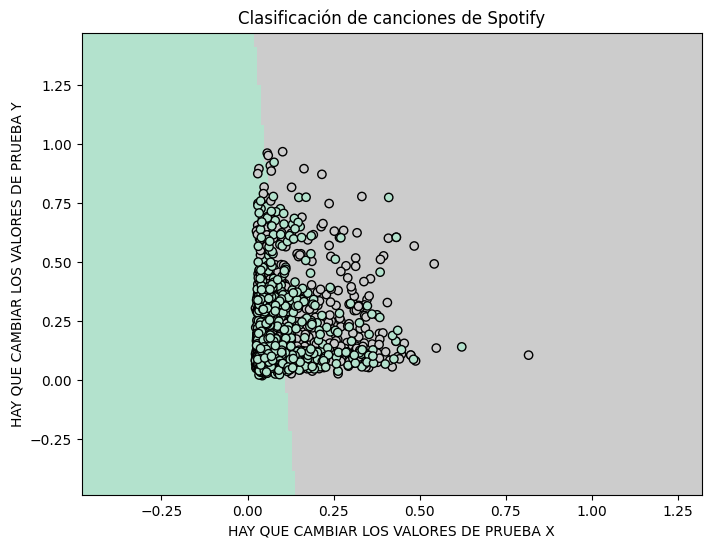

In [46]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

# Dibujamos la malla con los diferentes colores
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)


# Dibujamos los puntos (flores) del dataset
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Pastel2)

plt.title('Clasificación de canciones de Spotify')
plt.xlabel('HAY QUE CAMBIAR LOS VALORES DE PRUEBA X')
plt.ylabel('HAY QUE CAMBIAR LOS VALORES DE PRUEBA Y')
plt.show()

In [47]:
# Cálculo de Predicción
X_cancion = X_test[1]
y_cancion = y_test[1]

print('Cancion: X={} - y={} - Clase = {}'.format(X_cancion, y_cancion, le.inverse_transform([y_cancion])))

Cancion: X=[0.17  0.123] - y=0 - Clase = [0]


In [ ]:
prediccion = logreg.predict([X_cancion])
probabilidades = logreg.decision_function([X_cancion])

print('Predicción -> Pertenece a la clase {}'.format(prediccion))
print('Predicción Etiquetada -> Pertenece a la clase {}'.format(le.inverse_transform(prediccion)))
print('Probabilidad de pertenencia a cada clase: ' + \
      '\n\t HAY QUE CAMBIAR LOS VALORES DE PRUEBA: {:0.2f}\n\t HAY QUE CAMBIAR LOS VALORES DE PRUEBA: {:0.2f}\n\t HAY QUE CAMBIAR LOS VALORES DE PRUEBA: {:0.2f}' \
     .format(probabilidades[0,0], probabilidades[0,1], probabilidades[0,2]))

# Modelos de Machine Learning:

## KNN (K-Nearest Neighbors)

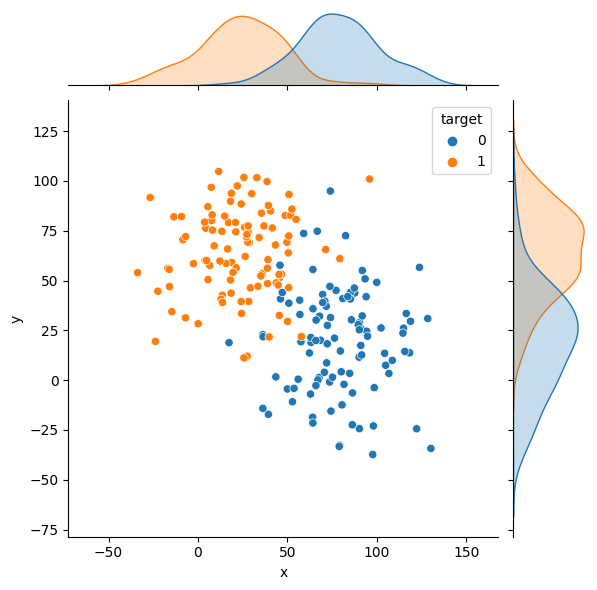

In [42]:
muestras = 100

mediaX1 = 80
desvioX1 = 20

mediaY1 = 20
desvioY1 = 25

mediaX2 = 20
desvioX2 = 25

mediaY2 = 60
desvioY2 = 20


X1 = pd.Series(np.random.normal(loc=mediaX1, scale=desvioX1, size=muestras))
Y1 = pd.Series(np.random.normal(loc=mediaY1, scale=desvioY1, size=muestras))
Data1 = pd.DataFrame({'color':'red', 'target':0, 'x':X1, 'y':Y1})


X2 = pd.Series(np.random.normal(loc=mediaX2, scale=desvioX2, size=muestras))
Y2 = pd.Series(np.random.normal(loc=mediaY2, scale=desvioY2, size=muestras))
Data2 = pd.DataFrame({'color':'blue', 'target':1, 'x':X2, 'y':Y2})


Dataset_Multivariado = pd.concat([Data1, Data2], ignore_index=True, axis=0)

sns.jointplot(data=Dataset_Multivariado, x="x", y="y", kind="scatter", hue="target")


In [49]:
from sklearn.model_selection import train_test_split

X= Dataset_Multivariado[['x','y']].to_numpy()
y= Dataset_Multivariado[['target']].to_numpy()

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.5, random_state=42)

In [50]:
clasificadorKNN = KNeighborsClassifier(n_neighbors=2)
clasificadorKNN.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=2)

## SVM (Support Vector Machines)

In [24]:
# Máquina de vectores de soporte (SVM)
from sklearn.svm import SVC

svc = SVC(kernel='linear') # Clasificador
svc.fit(X_train, y_train) # Entrenar
svc.predict(X_test) # Predecir
svc.score(X_test,y_test) # Evaluar

0.6138613861386139

## Árbol de decisión

In [25]:
# Árbol de decisiones
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier # Clasificador
dtc.fit(X_train, y_train) # Entrenar
dtc.predict(X_test) # Predecir
dtc.score(X_test,y_test) # Evaluar

TypeError: ignored

## Bayes (Naive Bayes)

In [26]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()# Clasificador
gnb.fit(X_train, y_train) # Entrenar
gnb.predict(X_test) # Predecir
gnb.score(X_test,y_test) # Evaluar

0.5841584158415841

## Otro modelo que crean conveniente

In [27]:
# K-means (El vecino mas cercano)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7) # Clasificador (n_neighbors = número de vecinos)
knn.fit(X_train, y_train) # Entrenar
knn.predict(X_test) # Predecir
knn.score(X_test,y_test) # Evaluar

0.5495049504950495

In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() # Clasificador
svc.fit(X_train, y_train) # Entrenar
svc.predict(X_test) # Predecir
svc.score(X_test,y_test) # Evaluar

0.6138613861386139

# Realizar algún tipo de validación:





## Validación Simple

## Validación Cruzada k-fold



# Evaluación y análisis del rendimiento de cada modelo:

## Matriz de confusión

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
matriz_confusion = confusion_matrix(y_true=y_real, y_pred=y_predict, labels=[1, 0])
plot_confusion_matrix(matriz_confusion, classes=['Clase 1', 'Clase 0'], title='Matriz de Confusión')
plt.show()

NameError: ignored

<Figure size 640x480 with 0 Axes>

## Precision

* Basandonos en el ejemplo, calculamos la precision como:

$$Precision = \frac{TP}{TP + FP} = \frac{4}{4 + 2} = \frac{4}{6} = 0.67$$

In [30]:
from sklearn.metrics import precision_score

precision_score(y_true=y_real, y_pred=y_predict, average='macro')

NameError: ignored

## Recall

* Basandonos en el ejemplo, calculamos el recall como:

$$Recall = \frac{TP}{TP + FN} = \frac{4}{4 + 1} = \frac{4}{5} = 0.8$$

In [31]:
from sklearn.metrics import recall_score

recall_score(y_true=y_real, y_pred=y_predict, average='macro')

NameError: ignored

## F1

* Basandonos en el ejemplo, calculamos el F1 como:

$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} = 2 \cdot \frac{0.67 \cdot 0.8}{0.67 + 0.8} = 2 \cdot \frac{0.54}{1.47} = 0.73$$

In [32]:
from sklearn.metrics import f1_score

f1_score(y_true=y_real, y_pred=y_predict, average='macro')

NameError: ignored

### Clasificación Múltiple

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_real, y_pred=y_predict))

NameError: ignored

# Ajustar para cada uno de los modelos los hiper parámetros:

## Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

print("Mejores parámetros:", clf.best_params_)

print("Mejor score:", clf.best_score_)

Mejores parámetros: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Mejor score: 0.5328607859502371


## Random Search

# Realizar un ensamble de los modelos:

## Votación Mayoritaria

# Evaluación y análisis del rendimiento:

## Matriz de confusión

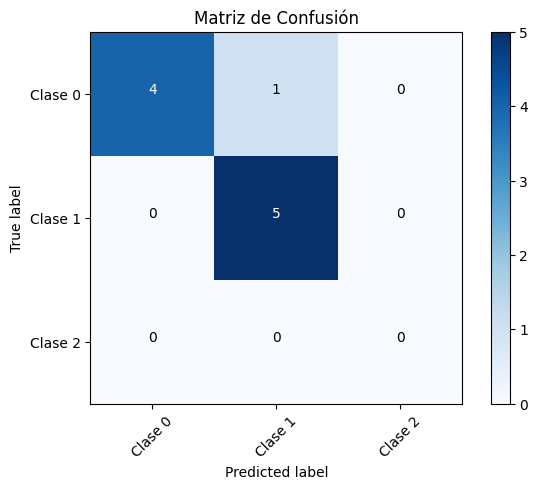

In [ ]:
plt.figure()
matriz_confusion = confusion_matrix(y_true=y_real, y_pred=y_predict, labels=[0, 1, 2])
plot_confusion_matrix(matriz_confusion, classes=['Clase 0', 'Clase 1', 'Clase 2'], title='Matriz de Confusión')
plt.show()

## Precisión, recall y F1-score

Grupo 8 : Cintia Cuevas, Daniela Soto, Nicolas Pelleritti